# Double pendulum using Euler-Lagrange's equation

Defines a DoublePendulum class that is used to generate double pendulum plots from solving euler-Lagrange's equations.


made by XiangZhang


In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

## Euler-Lagrange equation

For a double pendulum, the Lagrangian with generalized coordinate $\phi_1$ and $\phi_2$ is

$\begin{align}
  \mathcal{L} = T - U = \frac12 (m_1 + m_2 ) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos (\phi_1 - \phi_2)
  + \frac12 m_2 L_2^2 \dot\phi_2^2 + \cos \phi_1 L_1 (m_1 + m_2) g + \cos \phi_2 L_2 m_2 g
\end{align}$

The Euler-Lagrange equations based on book:

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad &
 (m_1 + m_2) L_1^2 \ddot \phi_1 + m_2 L_1 L_2 \ddot \phi_2 \cos(\phi_1 - \phi_2) -m_2 L_1 L_2 \dot\phi_2 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\\
 &= -m_2 L_1 L_2 \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - (m_1 + m_2) L_1 g \sin\phi_1 \\
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad &
 m_2 L_2^2 \ddot \phi_2 + m_2 L_1 L_2 \ddot \phi_1 \cos(\phi_1 - \phi_2) -m_2 L_1 L_2 \dot\phi_1 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\\
 &= m_2 L_1 L_2 \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - m_2 L_2 g \sin\phi_2.
\end{align}$



# Pendulum class 

In [2]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    
    L1 : float
        length of the Upper pendulum
    L2 : float
        length of the lower pendulum
    g : float
        gravitational acceleration at the earth's surface 
    m1 : float
        mass of upper pendulum
    m2 : float
        mass of lower pendulum    

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt d^2phi_1/dt^2 dphi_2/dt d^2phi_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t) y[1] = dphi_1/dt y[2]=phi_2(t) y[3] = dphi_2(t)
            
        Returns
        -------
        
        """
        y1_dot = (-self.g * (2.*self.m1+ self.m2)*np.sin(y[0])-self.m2*self.g*np.sin(y[0]-2*y[2])\
                -2.*np.sin(y[0]-y[2])*self.m2*(y[3]**2*self.L2+y[1]**2 * self.L1 * np.cos(y[0]-y[2])))\
                /(self.L1 * (2.*self.m1 + self.m2 - self.m2*np.cos(2*y[0]-2*y[2])))
        y2_dot = (2*np.sin(y[0]-y[2])*((y[1]**2)*self.L1* (self.m1+ self.m2)+(self.m1+ self.m2)*self.g *np.cos(y[0])\
                  +y[3]**2*self.L2*self.m2*np.cos(y[0]-y[2]))) / (self.L2 * (2.*self.m1 +self.m2 - self.m2*np.cos(2*y[0]-2*y[2])))
        return [y[1], y1_dot, y[3],y2_dot]
    
    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0,phi_2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot,phi_2,phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plot 

In [5]:
# Labels for individual plot axes
state_space_labels = (r'$\phi$', r'$d\phi/dt$')
phi_vs_time_labels = (r'$t$',r'$\phi$')

# Set the prameter 
L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

# Initialize the pendulum
p1 = DoublePendulum(L1 = L1, L2 =L2,m1 = m1,m2=m2, g=g)


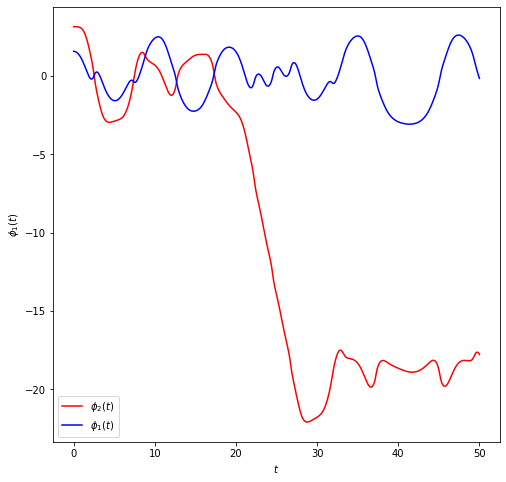

In [6]:
# Set initial
phi_1_0 = np.pi/2
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.

phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0,phi_2_0,phi_2_dot_0)

# Make the plot
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('$\phi_1(t)$')
ax.set_xlabel('$t$')
ax.plot(t_pts,phi_2,'r',label='$\phi_2(t)$')
ax.plot(t_pts,phi_1,'b',label='$\phi_1(t)$')
ax.legend()


## Show the Chaotic

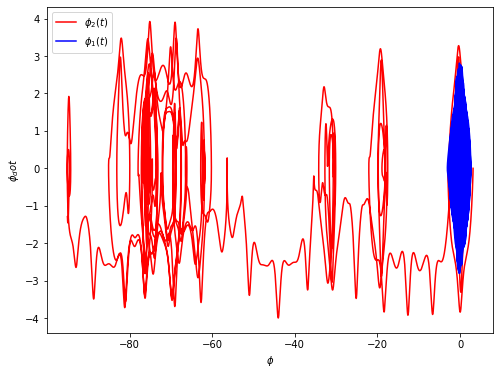

In [14]:
# Set time interval
t_start = 0.
t_end = 250.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

# Set initial
phi_1_0 = np.pi/2.
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.

phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0,phi_2_0,phi_2_dot_0)

# Make the plot
fig = plt.figure(figsize =(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('$\phi_dot$')
ax.set_xlabel('$\phi$')
ax.plot(phi_2,phi_2_dot,'r',label='$\phi_2(t)$')
ax.plot(phi_1,phi_1_dot,'b',label='$\phi_1(t)$')
ax.legend(loc = 'best')

based on the hint i decide to make a small change to check the chaotic 

(1e-07, 1.0)

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


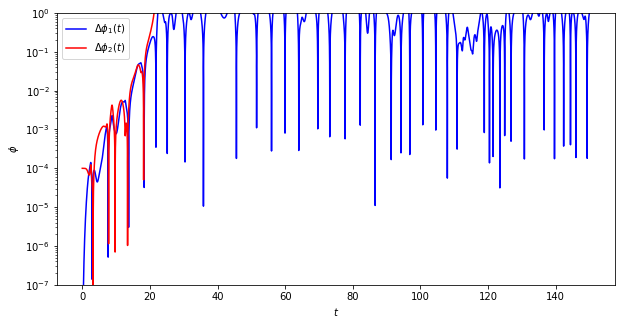

In [16]:
t_start = 0.
t_end = 150.
phi_1,phi_1_dot,phi_2,phi_2_dot = p1.solve_ode(t_pts,phi_1_0,phi_1_dot_0,phi_2_0,phi_2_dot_0)
phi_1b,phi_1_dotb,phi_2b,phi_2_dotb = p1.solve_ode(t_pts,phi_1_0,phi_1_dot_0,phi_2_0-0.0001,phi_2_dot_0)

fig = plt.figure(figsize = (10,5))
ax_a = fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start:stop],np.abs(phi_1[start:stop]-phi_1b[start:stop]),
            axis_labels =phi_vs_time_labels,
           color = 'b',semilogy = True,label = r'$\Delta\phi_1(t)$',
           ax=ax_a)
plot_y_vs_x(t_pts[start:stop],np.abs(phi_2[start:stop]-phi_2b[start:stop]),
           color = 'r',semilogy = True,label = r'$\Delta\phi_2(t)$',
           ax=ax_a)
ax_a.set_ylim(1.e-7,1.)
